In [3]:
import os
import time

import pandas as pd
# from pgdrive.envs.marl_envs.maround_svo import MARoundSVO
# from pgdrive.envs.marl_envs.marl_intersection import MultiAgentIntersectionEnv
# from pgdrive.envs.marl_envs.marl_inout_roundabout import MultiAgentRoundaboutEnv

from copo import pretty_print
# from drivingforce.mapgdrive.eval.get_policy_function import PolicyFunction
# from drivingforce.mapgdrive.eval.recoder import RecorderEnv

import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

sns.set("notebook")

% matplotlib inline

ModuleNotFoundError: No module named 'copo'

In [ ]:
data_path = {
#     "round": {
#         "IPPO": "formal_results/round_ippo.csv",
#         "CoPO": "formal_results/0519_round_metasvodist.csv",
#         "CL": "formal_results/0519_round_cl.csv",
#         "CCPPO": "formal_results/0519_round_ccppo.csv",
#     },
    "inter": {
        "IPPO": "demo_results/inter_ippo.csv",
#         "CCPPO": "demo_results/0519_inter_ccppo.csv",
#         "CL": "demo_results/0519_inter_cl.csv",
        "CoPO": "demo_results/0519_inter_metasvodist.csv",
    },
#     "parking": {
#         "IPPO": "formal_results/0519_parking_ippo.csv",
#         "CCPPO": "formal_results/0519_parking_ccppo.csv",
#         "CL": "formal_results/0519_parking_cl.csv",
#         "CoPO": "formal_results/0519_parking_metasvodist.csv",
#     },
#     "bottle": {
#         "IPPO": "formal_results/0519_bottle_ippo.csv",
#         "CCPPO": "formal_results/0519_bottle_ccppo.csv",
#         "CL": "formal_results/0519_bottle_cl.csv",
#         "CoPO": "formal_results/0519_bottle_metasvodist.csv",
#     },
#     "tollgate": {
#         "IPPO": "formal_results/0519_tollgate_ippo.csv",
#         "CCPPO": "formal_results/0519_tollgate_ccppo.csv",
#         "CoPO": "formal_results/0523_tollgate_metasvodist_formal.csv",
#         "CL": "formal_results/0519_tollgate_cl.csv"
#     }
}

# We don't have enough seeds, so just rerun!
rerun_data_path = {
#     "round": {
#         "IPPO": "formal_results/0523_rerun_round_ippo.csv",
#         "CCPPO": "formal_results/0522_rerun_round_ccppo.csv",
#         "CoPO": "formal_results/0522_rerun_round_metasvodist.csv",
#     },
    "inter": {
        "IPPO": "demo_results/0522_rerun_inter_ippo.csv",
        "CCPPO": "demo_results/0522_rerun_inter_ccppo.csv",
    },
#     "parking": {
#         "IPPO": "formal_results/0522_rerun_parking_ippo.csv",
#         "CCPPO": "formal_results/0522_rerun_parking_ccppo.csv",
#     },
#     "bottle": {
#         "IPPO": "formal_results/0522_rerun_bottle_ippo.csv",
#         "CCPPO": "formal_results/0522_rerun_bottle_ccppo.csv",
#         "CoPO": "formal_results/0522_rerun_bottle_metasvodist.csv",
#     },
#     "tollgate": {
#         "IPPO": "formal_results/0522_rerun_tollgate_ippo.csv",
#         "CCPPO": "formal_results/0522_rerun_tollgate_ccppo.csv",
        
#     }
}
threshold_dict = {
#     "round": 100_0000,
    "inter": 100_0000,
#     "parking": 100_0000,
#     "bottle": 100_0000,
#     "tollgate": 100_0000
}
df_list = []
for env, env_path in data_path.items():
    for algo, algo_path in env_path.items():
        
        if algo == "CoPO":
            algo = "metasvodist"
        
        df = pd.read_csv(algo_path)
        df["algo"] = algo.lower()
        df["env"] = env.lower()
        df = df[df.timesteps_total < threshold_dict[env]]
        df_list.append(df)
        
for env, env_path in rerun_data_path.items():
    for algo, algo_path in env_path.items():
        
        
        if algo == "CoPO":
            algo = "metasvodist"
            
        df = pd.read_csv(algo_path)
        df["algo"] = algo.lower()
        df["env"] = env.lower()
        df = df[df.timesteps_total < threshold_dict[env]]
        df_list.append(df)
        
data_df = pd.concat(df_list)


In [10]:


removed_trials = [
    "c4edf_00004", 
    
    # wrong round meta, is nan
    "bfb6f_00001", "bfb6f_00002", "bfb6f_00003",
    
    # inter ippo, too low
    "704f6_00005", "704f6_00004", "704f6_00000", "704f6_00001", "704f6_00002", "704f6_00003",
    
    
    # inter cl, too good
    "a1f4d_00001",
    
    # inter meta, too bad
    "383f4_00003",
    
    # parking ccppo, too bad
    "8420a_00003", 
    
    # round meta, too bad
    "e8610_00001", "e8610_00002", "307e8_00000",
    
]

final_plot_data_from_raw_data = []
for (env, algo), gb in data_df.groupby(["env", "algo"]):
    
    res = []
    for t, gbb in gb.groupby('trial_id'):
        if t in removed_trials:
            continue
        gbb_new = gbb[(gbb.timesteps_total < 100_0000) & (gbb.timesteps_total > 98_0000)]
        
#         if len(gbb_new) == 0:
#             gbb_new = gbb[(gbb.timesteps_total < 100_0000) & (gbb.timesteps_total > 95_0000)]
            
#         assert len(gbb_new) > 0
        gbb = gbb_new
        
        val = gbb.success.mean()
        
        print("env {}, algo {}, val {}".format(env, algo, val))
        
        final_plot_data_from_raw_data.append({
            "env": env,
            "algo": algo,
            "model_index": t,
            "stat_key": "success",
            "print_key": "Competence",
            "value": val
        })


env bottle, algo ccppo, val 0.7994254305277865
env bottle, algo ccppo, val 0.6604588715692332
env bottle, algo ccppo, val 0.6115584514132362
env bottle, algo ccppo, val 0.7706094464889934
env bottle, algo ccppo, val 0.6466712533206698
env bottle, algo ccppo, val 0.7416525861894209
env bottle, algo ccppo, val 0.8041054496519324
env bottle, algo cl, val 0.7380190897063876
env bottle, algo cl, val 0.8268238321344152
env bottle, algo cl, val 0.7893626848194237
env bottle, algo cl, val 0.6297499775230593
env bottle, algo cl, val 0.8057148351854149
env bottle, algo ippo, val 0.7089359734451248
env bottle, algo ippo, val 0.8035061893038481
env bottle, algo ippo, val 0.737323759207401
env bottle, algo ippo, val 0.5164631089360452
env bottle, algo ippo, val 0.7930898130999997
env bottle, algo ippo, val 0.7491258508567912
env bottle, algo ippo, val 0.688586017201291
env bottle, algo ippo, val 0.7974514902587857
env bottle, algo metasvodist, val 0.8150387444781635
env bottle, algo metasvodist, va

In [11]:
df = []
for algo in ["ccppo", "cl", "ippo", "metasvodist"]:
    for env in ["round", "inter", "parking", "tollgate", "bottle"]:
        for i in range(5):
            p = os.path.abspath("../evaluate_results/{}_{}_{}.csv".format(algo, env, i))
            if os.path.exists(p):
                tmp = pd.read_csv(p)
                tmp["env"] = env
                tmp["algo"] = algo
                tmp["model_index"] = i
                df.append(tmp)
                print("Saved ", algo, env, i)
                
                
for algo in ["ccppo", "cl", "ippo", "metasvodist"]:
    for env in ["round", "inter", "parking", "tollgate", "bottle"]:
        for i in range(10):
            p = os.path.abspath("../evaluate_results/{}_{}_rerun_{}.csv".format(algo, env, i))
            if os.path.exists(p):
                tmp = pd.read_csv(p)
                tmp["env"] = env
                tmp["algo"] = algo
                tmp["model_index"] = i + 100
                df.append(tmp)
                print("Saved ", algo, env, i)
                
df = pd.concat(df)

Saved  ccppo round 0
Saved  ccppo round 1
Saved  ccppo round 2
Saved  ccppo inter 0
Saved  ccppo inter 1
Saved  ccppo inter 2
Saved  ccppo parking 0
Saved  ccppo parking 1
Saved  ccppo parking 2
Saved  ccppo tollgate 0
Saved  ccppo tollgate 1
Saved  ccppo tollgate 2
Saved  ccppo tollgate 3
Saved  ccppo tollgate 4
Saved  ccppo bottle 0
Saved  ccppo bottle 1
Saved  ccppo bottle 2
Saved  cl round 0
Saved  cl round 1
Saved  cl round 2
Saved  cl round 3
Saved  cl round 4
Saved  cl inter 0
Saved  cl inter 1
Saved  cl inter 2
Saved  cl inter 3
Saved  cl inter 4
Saved  cl parking 0
Saved  cl parking 1
Saved  cl parking 2
Saved  cl parking 3
Saved  cl parking 4
Saved  cl tollgate 0
Saved  cl tollgate 1
Saved  cl tollgate 2
Saved  cl tollgate 3
Saved  cl tollgate 4
Saved  cl bottle 0
Saved  cl bottle 1
Saved  cl bottle 2
Saved  cl bottle 3
Saved  cl bottle 4
Saved  ippo round 0
Saved  ippo round 1
Saved  ippo round 2
Saved  ippo round 3
Saved  ippo round 4
Saved  ippo inter 0
Saved  ippo inter 1

In [23]:
"""
'velocity_step_mean_episode_min',
'velocity_step_mean_episode_mean', 
'velocity_step_mean_episode_max',
'energy_step_mean_episode_min', 
'energy_step_mean_episode_mean',
'energy_step_mean_episode_max', 
'coll_step_mean_episode_min',
'coll_step_mean_episode_mean', 
'coll_step_mean_episode_max',
'num_neighbours_mean_episode_mean', 
'num_neighbours_mean_episode_max',
'num_agents_total', 
'num_agents_total_per_300_steps', 
'success_rate',
'num_agents_success', 
'num_agents_success_per_300_steps',
'num_agents_failed_per_300_steps', 
'episode_reward_mean',
'episode_reward_min', 
'episode_reward_max', 
'episode_cost_mean',
'episode_cost_min', 
'episode_cost_max', 
'episode_cost_sum',
'crash_rate', 
'num_agents_crash', 
'out_rate', 
'num_agents_out',
'episode_length_mean', 
'success_episode_length_mean',
'svo_estimate_deg_mean', 
'svo_estimate_deg_min', 
'svo_estimate_deg_max',
'svo_reward', 
'episode', 
'env', 
'algo', 
'model_index']       
"""

df["num_agents_per_300_steps"] = df["num_agents_success_per_300_steps"] + \
    df["num_agents_failed_per_300_steps"]

df["fixed_efficiency"] = (df["num_agents_success"] - df["num_agents_crash"] - df["num_agents_out"]) / 1000

df["num_failed"] = df["num_agents_crash"] + df["num_agents_out"]

data_keys = {
    "success": "Competence",
}




final_plot_data_from_eval_data = []
removed_trials = {
    "bottle": {
        "metasvodist": [3, 4],
#         "metasvodist": [0, 2, 4, 102, 3], 
        "cl": [4], "ippo": [1], "ccppo": [1]},
    "inter": {
        "metasvodist":  [0, 2], 
              "cl": [1], 
        "ippo": [0, 4], 
#         "ccppo": [0]
    },
    "parking": {
#         "metasvodist": [], 
        "cl": [0, 3]},
    "round": {
        "metasvodist": [3,], 
        "ippo": [3],
        "cl": [0, 1]
             },
    "tollgate": {
        "ippo": [1, 3],
        "ccppo": [2, 3],
        "cl": [1, 2, 3],
#         "metasvodist": [2, 3]
    }
}

stat_key = "fixed_efficiency"
print_key = "Efficiency"
for env, gb_env in df.groupby("env"):
    for algo, gb in gb_env.groupby('algo'):
        res = []
        for model_index, gbb in gb.groupby("model_index"):
            if model_index in removed_trials.get(env, {}).get(algo, {}):
                continue
                
                
            val = gbb[stat_key].mean()
            
            assert np.isscalar(val)
            
            final_plot_data_from_eval_data.append({
                "env": env,
                "algo": algo,
                "model_index": model_index,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val
            })

stat_key = "coll_step_mean_episode_mean"
print_key = "Diversity"
for env, gb_env in df.groupby("env"):
    for algo, gb in gb_env.groupby('algo'):
        res = []
        for model_index, gbb in gb.groupby("model_index"):
            if model_index in removed_trials.get(env, {}).get(algo, {}):
                continue

            val = gbb[stat_key].mean()
            val = -val
            
            final_plot_data_from_eval_data.append({
                "env": env,
                "algo": algo,
                "model_index": model_index,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val
            })
            

        
stat_key = "num_failed"
print_key = "Safety"
for env, gb_env in df.groupby("env"):
    for algo, gb in gb_env.groupby('algo'):
        res = []
        for model_index, gbb in gb.groupby("model_index"):
            if model_index in removed_trials.get(env, {}).get(algo, {}):
                continue
            
            val = gbb[stat_key].mean()
            print("Env {}, Algo {}, Model {}, Val {:.3f} (Suc {:.3f}, "
                  "Eff {:.3f}, Div {:.3f}), num agent {:.3f}"
                  .format(
                env, algo, model_index, val, gbb.success_rate.mean(), 
                gbb["fixed_efficiency"].mean(),
                gbb["coll_step_mean_episode_mean"].mean(),
                gbb["num_agents_total"].mean(),
#                 len(gbb)
            ))

            val = -val
            
            final_plot_data_from_eval_data.append({
                "env": env,
                "algo": algo,
                "model_index": model_index,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val
            })
            

Env bottle, Algo ccppo, Model 0, Val 39.100 (Suc 0.741, Eff 0.072, Div 0.152), num agent 150.450
Env bottle, Algo ccppo, Model 2, Val 41.400 (Suc 0.704, Eff 0.057, Div 0.170), num agent 139.450
Env bottle, Algo cl, Model 0, Val 41.650 (Suc 0.694, Eff 0.052, Div 0.186), num agent 135.750
Env bottle, Algo cl, Model 1, Val 43.200 (Suc 0.687, Eff 0.051, Div 0.221), num agent 137.600
Env bottle, Algo cl, Model 2, Val 53.750 (Suc 0.620, Eff 0.033, Div 0.240), num agent 140.950
Env bottle, Algo cl, Model 3, Val 38.750 (Suc 0.710, Eff 0.055, Div 0.208), num agent 132.900
Env bottle, Algo ippo, Model 0, Val 45.050 (Suc 0.680, Eff 0.050, Div 0.167), num agent 140.350
Env bottle, Algo ippo, Model 2, Val 39.600 (Suc 0.735, Eff 0.070, Div 0.175), num agent 149.350
Env bottle, Algo metasvodist, Model 0, Val 16.100 (Suc 0.801, Eff 0.048, Div 0.105), num agent 80.600
Env bottle, Algo metasvodist, Model 1, Val 19.000 (Suc 0.841, Eff 0.081, Div 0.169), num agent 119.450
Env bottle, Algo metasvodist, Mod

Env bottle, Algo metasvodist, Key Competence, val min 0.5164631089360452, val max 0.8268238321344152
Env bottle, Algo metasvodist, Key Diversity, val min -0.23950073872112787, val max -0.09771370019671914
Env bottle, Algo metasvodist, Key Efficiency, val min 0.03345000000000001, val max 0.0849
Env bottle, Algo metasvodist, Key Safety, val min -53.75, val max -16.1
Env inter, Algo metasvodist, Key Competence, val min 0.5758157615476367, val max 0.8275986461399869
Env inter, Algo metasvodist, Key Diversity, val min -0.2248440691973644, val max -0.09304114216062717
Env inter, Algo metasvodist, Key Efficiency, val min -0.04285, val max 0.09875
Env inter, Algo metasvodist, Key Safety, val min -137.65, val max -21.05
Env parking, Algo metasvodist, Key Competence, val min 0.47841917832972236, val max 0.6585133372097257
Env parking, Algo metasvodist, Key Diversity, val min -0.07917472725598469, val max -0.03732340625077922
Env parking, Algo metasvodist, Key Efficiency, val min 0.0027, val max 

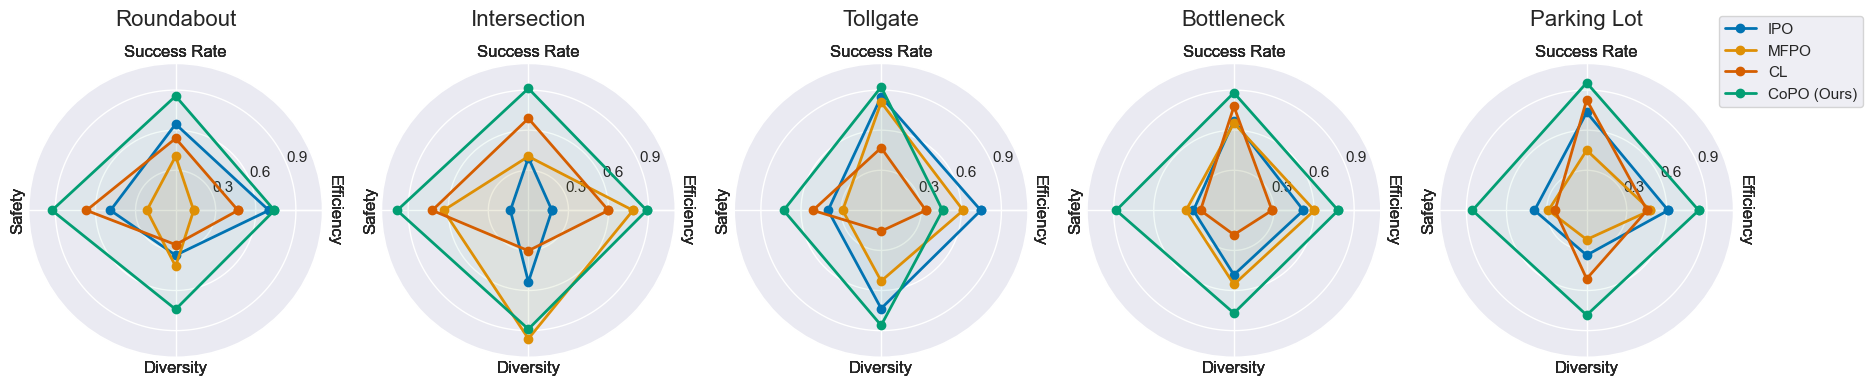

In [24]:
final_plot_data_to_plot = final_plot_data_from_eval_data + final_plot_data_from_raw_data
final_plot_data_to_plot = pd.DataFrame(final_plot_data_to_plot)

new_df = []
for env, gb in final_plot_data_to_plot.groupby("env"):
    for k, gbb in gb.groupby("print_key"):
        val = gbb.value
        print(f"Env {env}, Algo {algo}, Key {k}, val min {val.min()}, val max {val.max()}")
        val = (val - val.min()) / (val.max() - val.min())
        gb.loc[gb.print_key == k, "value"] = val
    new_df.append(gb)
final_plot_data_to_plot = pd.concat(new_df)


sns.set("notebook", "darkgrid")
c = sns.color_palette("colorblind")
c = [c[0], c[1], c[3], c[2]]

env_mapping = {
    "bottle": "Bottleneck",
    "tollgate": "Tollgate",
    "inter": "Intersection",
    "round": "Roundabout",
    "parking": "Parking Lot"
}

algo_mapping = {
    "ippo": "IPO",
    "ccppo": "MFPO",
    "metasvodist": "CoPO (Ours)",
    "cl": "CL"
}

algo_order = ["ippo", "ccppo", "cl", "metasvodist"]


env_order = ["round", "inter", "tollgate", "bottle", "parking"]


# matplotlib.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(dpi=100, figsize=(22, 6))  

for env_count, env in enumerate(env_order):
    env_plot_data = final_plot_data_to_plot[final_plot_data_to_plot.env == env] 

    ax = fig.add_subplot(1, 5, env_count + 1, polar=True)
    
    for algo_count, algo in enumerate(algo_order):
        algo_plot_data = env_plot_data[env_plot_data.algo == algo]
    
        labels = ["Efficiency", "Competence", "Safety", "Diversity"]
        plot_labels = ["Efficiency", "Success Rate", "Safety", "Diversity"]
        
        stats = [algo_plot_data[algo_plot_data.print_key == k].value.mean() for k in labels]
        
        angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        stats = np.concatenate((stats, [stats[0]]))
        angles = np.concatenate((angles, [angles[0]]))

        ax.plot(angles, stats, 'o-', linewidth=2, label=algo_mapping[algo], c=c[algo_count])
        ax.fill(angles, stats, alpha=0.05, c=c[algo_count])
        ax.set_ylim(0, 1.1)

        ax.set_thetagrids(angles * 180/np.pi, plot_labels)
        
        ax.tick_params(pad=-5)

        plt.gcf().canvas.draw()
#         angles = np.linspace(0,2*np.pi,len(ax.get_xticklabels())+1)
#         angles[np.cos(angles) < 0] = angles[np.cos(angles) < 0] + np.pi
#         angles = np.rad2deg(angles)
        labels = []
        angles = [270, 0, 90, 0]
        for label, angle in zip(ax.get_xticklabels(), angles):
            x,y = label.get_position()
            lab = ax.text(x,y, label.get_text(), transform=label.get_transform(),
                          ha=label.get_ha(), va=label.get_va(),
                          fontname=label.get_fontname(),
                          fontstyle="normal",
                          fontweight="light"
                         )
            lab.set_rotation(angle)
        ax.set_xticklabels([])
        ax.set_yticks([0.3, 0.6, 0.9])
        ax.set_title(env_mapping[env], size=16, y=1.1)
        
ax.legend(loc=(0.95, 0.85))
fig.savefig("formal_figs/main_result_fix_round.pdf".format(env), format='pdf', dpi=300, bbox_inches = "tight")



Env bottle, Algo metasvodist, Key Competence, val min 0.5164631089360452, val max 0.8268238321344152
Env bottle, Algo metasvodist, Key Diversity, val min -0.23950073872112787, val max -0.09771370019671914
Env bottle, Algo metasvodist, Key Efficiency, val min 0.03345000000000001, val max 0.0849
Env bottle, Algo metasvodist, Key Safety, val min -53.75, val max -16.1
Env inter, Algo metasvodist, Key Competence, val min 0.5758157615476367, val max 0.8275986461399869
Env inter, Algo metasvodist, Key Diversity, val min -0.2248440691973644, val max -0.09304114216062717
Env inter, Algo metasvodist, Key Efficiency, val min -0.04285, val max 0.09875
Env inter, Algo metasvodist, Key Safety, val min -137.65, val max -21.05
Env parking, Algo metasvodist, Key Competence, val min 0.47841917832972236, val max 0.6585133372097257
Env parking, Algo metasvodist, Key Diversity, val min -0.07917472725598469, val max -0.03732340625077922
Env parking, Algo metasvodist, Key Efficiency, val min 0.0027, val max 

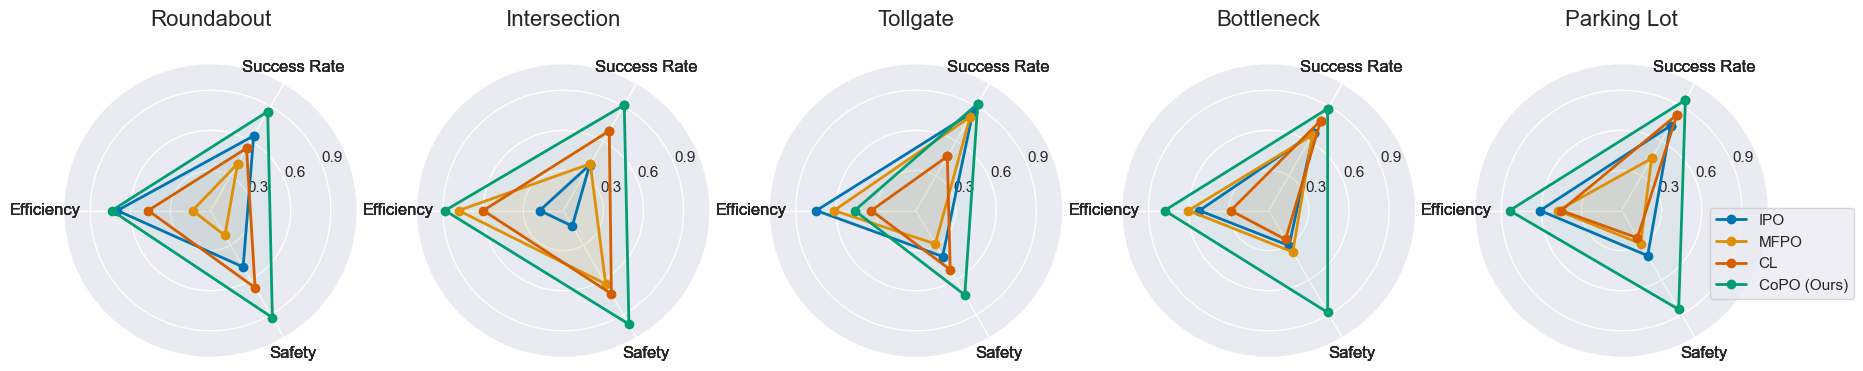

In [68]:
final_plot_data_to_plot = final_plot_data_from_eval_data + final_plot_data_from_raw_data
final_plot_data_to_plot = pd.DataFrame(final_plot_data_to_plot)

new_df = []
for env, gb in final_plot_data_to_plot.groupby("env"):
    for k, gbb in gb.groupby("print_key"):
        val = gbb.value
        print(f"Env {env}, Algo {algo}, Key {k}, val min {val.min()}, val max {val.max()}")
        val = (val - val.min()) / (val.max() - val.min())
        gb.loc[gb.print_key == k, "value"] = val
    new_df.append(gb)
final_plot_data_to_plot = pd.concat(new_df)


sns.set("notebook", "darkgrid")
c = sns.color_palette("colorblind")
c = [c[0], c[1], c[3], c[2]]

env_mapping = {
    "bottle": "Bottleneck",
    "tollgate": "Tollgate",
    "inter": "Intersection",
    "round": "Roundabout",
    "parking": "Parking Lot"
}

algo_mapping = {
    "ippo": "IPO",
    "ccppo": "MFPO",
    "metasvodist": "CoPO (Ours)",
    "cl": "CL"
}

algo_order = ["ippo", "ccppo", "cl", "metasvodist"]


env_order = ["round", "inter", "tollgate", "bottle", "parking"]


# matplotlib.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(dpi=100, figsize=(22, 6))  
ax_0 = None
for env_count, env in enumerate(env_order):
    env_plot_data = final_plot_data_to_plot[final_plot_data_to_plot.env == env] 

    ax = fig.add_subplot(1, 5, env_count + 1, polar=True)
    
    if env_count == 0:
        ax_0 = ax
    
    for algo_count, algo in enumerate(algo_order):
        algo_plot_data = env_plot_data[env_plot_data.algo == algo]
    
        labels = ["Competence", "Efficiency", "Safety"]
        plot_labels = ["Success Rate", "Efficiency", "Safety"]
        
        stats = [algo_plot_data[algo_plot_data.print_key == k].value.mean() for k in labels]
        
        angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)+ np.pi/2 - np.pi / 6
        stats = np.concatenate((stats, [stats[0]]))
        angles = np.concatenate((angles, [angles[0]]))

        ax.plot(angles, stats, 'o-', linewidth=2, label=algo_mapping[algo], c=c[algo_count])
        ax.fill(angles, stats, alpha=0.05, c=c[algo_count])
        ax.set_ylim(0, 1.1)

        ax.set_thetagrids(angles * 180/np.pi, plot_labels)
        
        ax.tick_params(pad=0)

        plt.gcf().canvas.draw()
        labels = []
        angles2 = [0, 0, 0]
        for label, angle in zip(ax.get_xticklabels(), angles2):
            x,y = label.get_position()
            lab = ax.text(x,y, label.get_text(), transform=label.get_transform(),
                          ha=label.get_ha(), va=label.get_va(),
                          fontname=label.get_fontname(),
                          fontstyle="normal",
                          fontweight="light"
                         )
            lab.set_rotation(angle)
        ax.set_xticklabels([])
        ax.set_yticks([0.3, 0.6, 0.9])
        ax.set_title(env_mapping[env], size=16, y=1.1)
        
ax.legend(loc=(0.8, 0.2))
fig.savefig("formal_figs/main_result.pdf".format(env), format='pdf', dpi=300, bbox_inches = "tight")


